In [53]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt

In [54]:
tickers = ['VFV.TO']
start = '2018-01-01'
end = dt.date.today()

In [55]:
df = pdr.get_data_yahoo(tickers, start, end)

In [56]:
df_close = df.Close
df_close.tail()

Symbols,VFV.TO
Date,
2020-04-20,70.849998
2020-04-21,69.010002
2020-04-22,70.459999
2020-04-23,69.910004
2020-04-24,70.949997


In [57]:
# Note that when calculating the M days moving average, the first M−1 are not valid,
# as M prices are required for the first moving average data point.
def sma(df, window):
    return df.rolling(window=window).mean()

# Calculate the 20 and 100 days MA of the closing prices

In [58]:
df_sma_20 = sma(df_close, 20)
df_sma_100 = sma(df_close, 100)
df_sma_20.tail()

Symbols,VFV.TO
Date,
2020-04-20,66.0095
2020-04-21,66.5810
2020-04-22,66.9640
2020-04-23,67.3545
2020-04-24,67.6245


# Plot

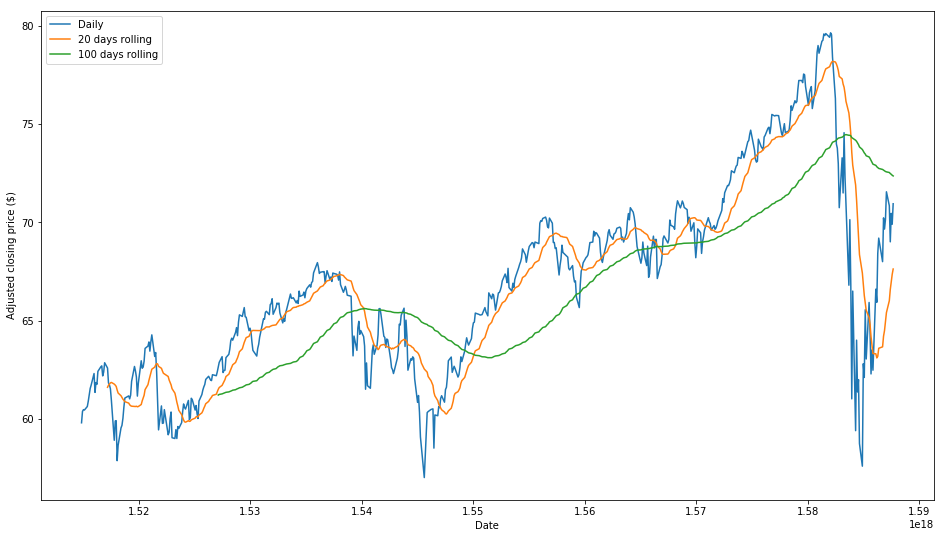

In [59]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_close.index, df_close, label='Daily')
ax.plot(df_sma_20.index, df_sma_20, label='20 days rolling')
ax.plot(df_sma_100.index, df_sma_100, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

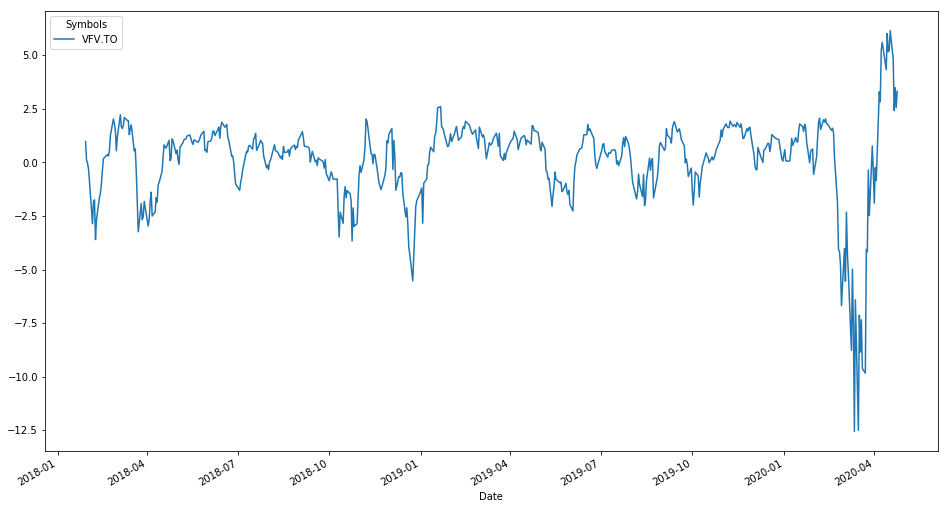

In [67]:
df_diff_daily_vs_sma20 = df_close - df_sma_20
df_diff_daily_vs_sma20.plot(figsize=(16,9))